<a href="https://colab.research.google.com/github/Tanishk-hubb/Data-analysis/blob/main/Minor_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Prediction Analysis**

## importing packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

from scipy import stats, signal

## Collecting Data

In [ ]:
stock_data = yf.download('^NSEI', start='2024-01-01', end='2025-01-01', multi_level_index=False)
stock_data.head(7)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-01-01,21741.900391,21834.349609,21680.849609,21727.750000,154000
2024-01-02,21665.800781,21755.599609,21555.650391,21751.349609,263700
2024-01-03,21517.349609,21677.000000,21500.349609,21661.099609,311900
2024-01-04,21658.599609,21685.650391,21564.550781,21605.800781,339200
2024-01-05,21710.800781,21749.599609,21629.199219,21705.750000,309300
2024-01-08,21513.000000,21763.949219,21492.900391,21747.599609,231500
2024-01-09,21544.849609,21724.449219,21517.849609,21653.599609,228600


In [ ]:
stock_data.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,23727.650391,23867.650391,23685.150391,23769.099609,177700
2024-12-26,23750.199219,23854.500000,23653.599609,23775.800781,177700
2024-12-27,23813.400391,23938.849609,23800.599609,23801.400391,176800
2024-12-30,23644.900391,23915.349609,23599.300781,23796.900391,364900
2024-12-31,23644.800781,23689.849609,23460.449219,23560.599609,193600


In [ ]:
stock_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

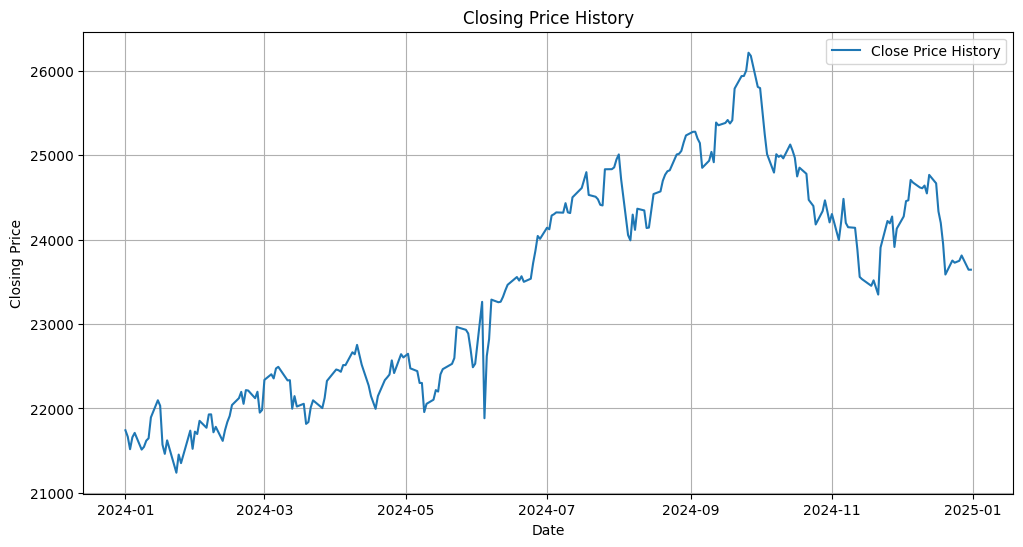

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label = 'Close Price History')
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## Time Series Decompsotion



#### Classical decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [ ]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

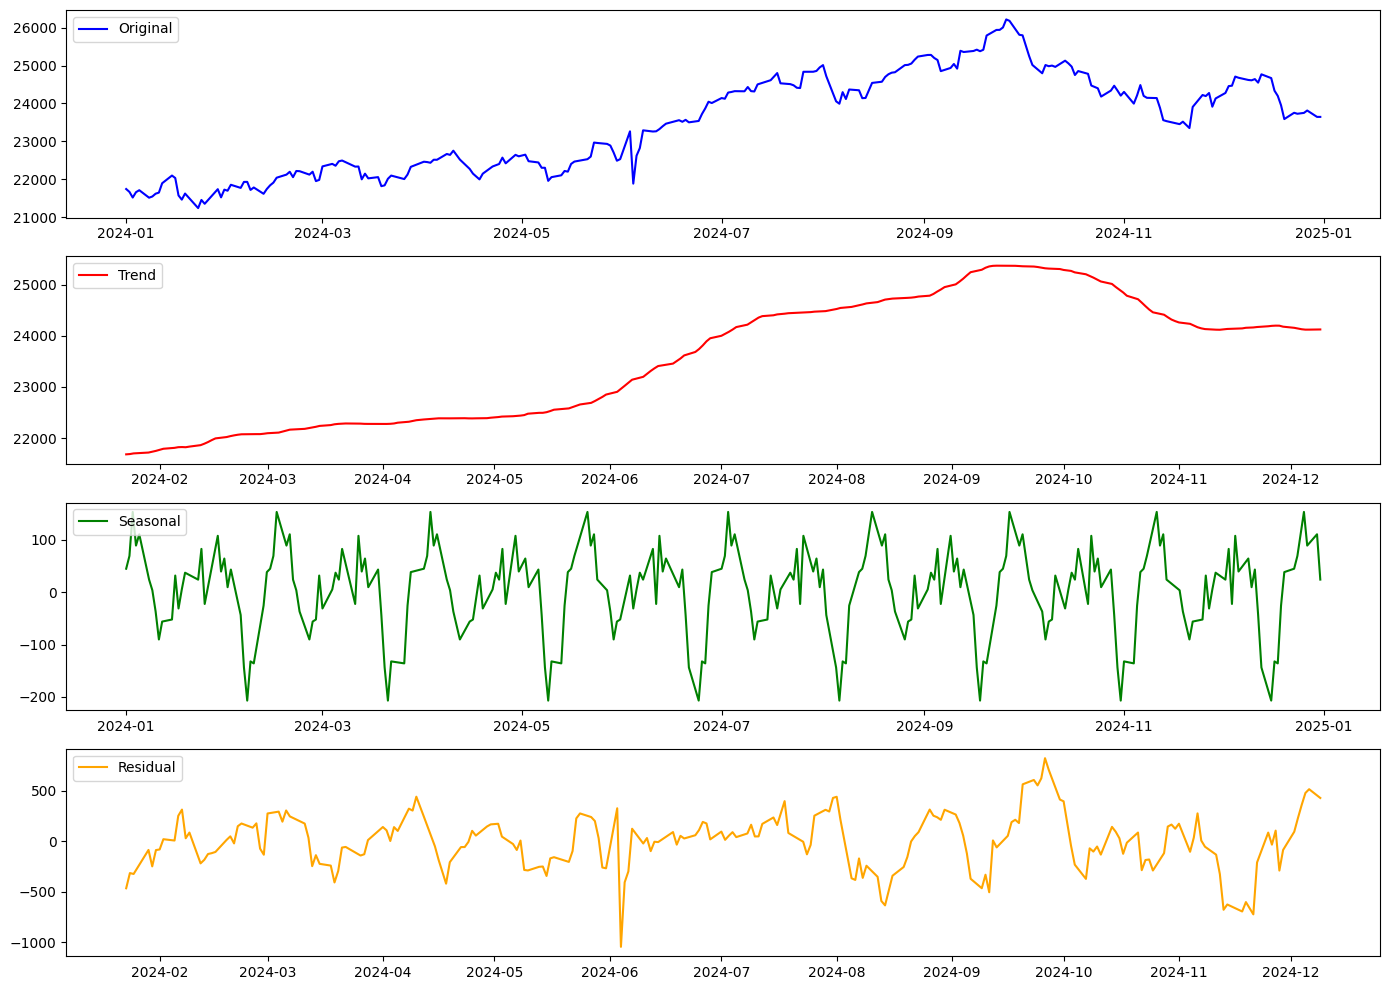

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### STL Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL

# performing STL decomposotion
stl = STL(stock_data['Close'], period=30) # period 30 means 30 days
result = stl.fit()

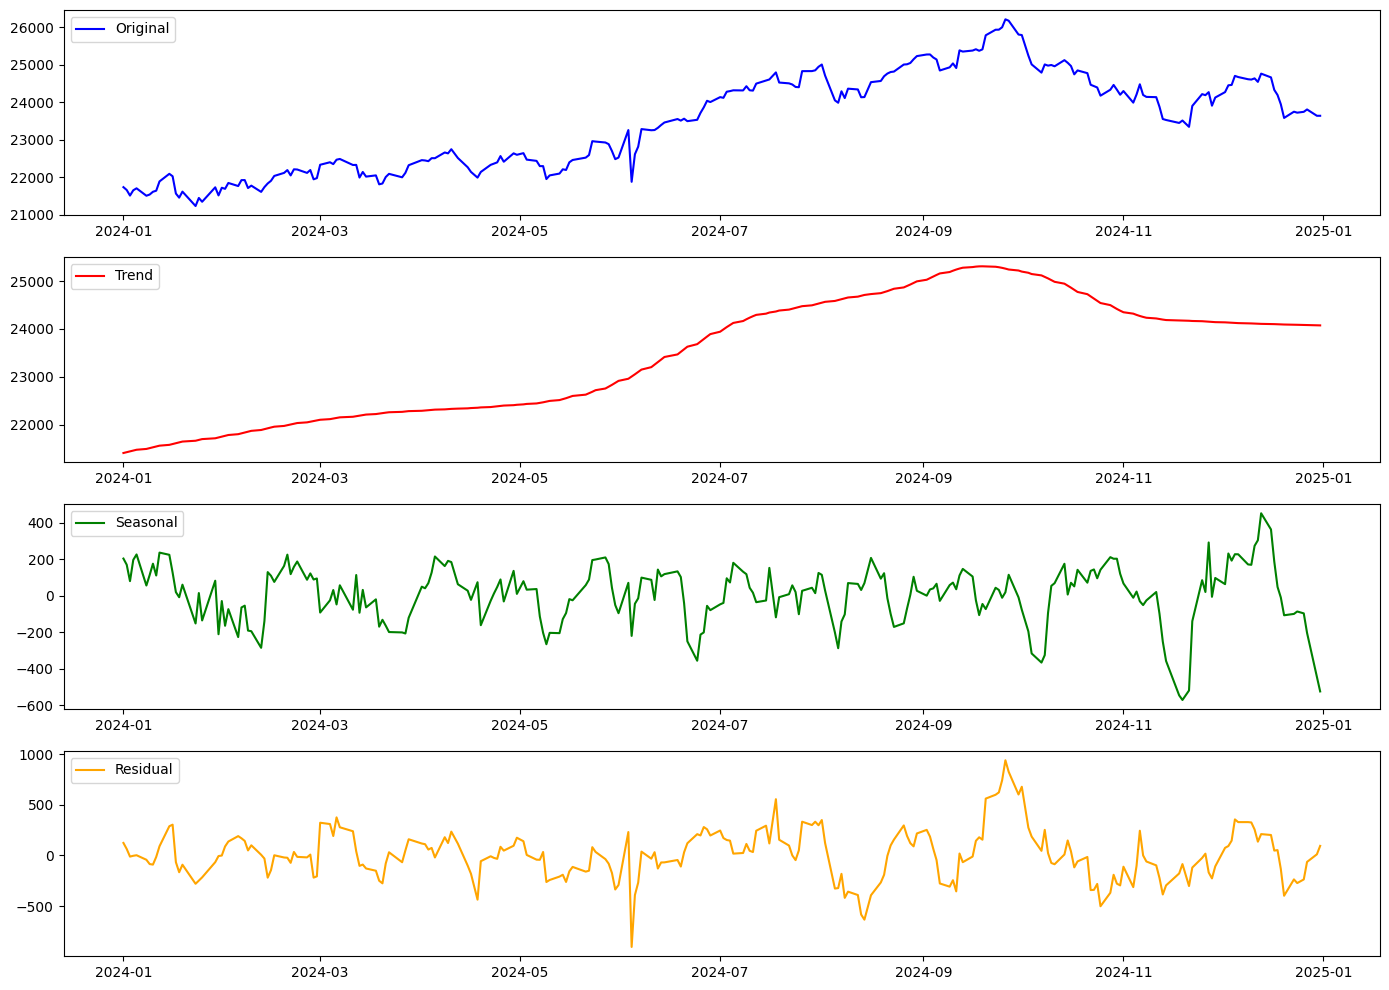

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Stationary Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_data['Close'])
print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'\t{key}: {round(value,3)}')

ADF Test Results:
ADF Statistic: -1.541
p-value: 0.513
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


* since p-value is greater than 0.05 so it is a non stationary data .
* criteria :- (p < 0.05) to be stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant level satisfaction and 'ct' for trend .
print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'\t{key}: {value}')

KPSS Test Results:
KPSS Statistic: 0.34
p-value: 0.01
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<ipython-input-12-487cb5af03d2>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant level satisfaction and 'ct' for trend .


* the warning suggest that our data is too large hence the p-value is too small
 (crieteria :- p-value < 0.05 {then non stationary}) indicating the data is strongly non stationary .



> **As we can see that from both the tests we got non stationary . and non stationary in case of checking for weak stationary so no need to check for strict stationary as weak is already non stationary .**





## Making time series data Stationary

In [ ]:
# writting ADF and KPSS tests to check for stationary .
def adf_test(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {round(result[0],3)}')
    print(f'p-value: {round(result[1],3)}')
    for key, value in result[4].items():
        print(f' Critical value {key}: {round(value,3)}')

def kpss_test(timeseries):
    result = kpss(timeseries)
    print(f'KPSS Statistic: {round(result[0],3)}')
    print(f'p-value: {round(result[1],3)}')
    for key, value in result[3].items():
        print(f' Critical value {key}: {round(value,3)}')

*Differencing*

In [ ]:
stock_data['Close']

,Close
Date,
2024-01-01,21741.900391
2024-01-02,21665.800781
2024-01-03,21517.349609
2024-01-04,21658.599609
2024-01-05,21710.800781
...,...
2024-12-24,23727.650391
2024-12-26,23750.199219
2024-12-27,23813.400391


In [ ]:
type(stock_data['Close'])

pandas.core.series.Series

In [ ]:
adf_test(stock_data['Close'])

ADF Statistic: -1.541
p-value: 0.513
 Critical value 1%: -3.457
 Critical value 5%: -2.873
 Critical value 10%: -2.573


In [ ]:
# first order differencing
stock_data_first_order = stock_data['Close'].diff()
stock_data_first_order

,Close
Date,
2024-01-01,NaN
2024-01-02,-76.099609
2024-01-03,-148.451172
2024-01-04,141.250000
2024-01-05,52.201172
...,...
2024-12-24,-25.798828
2024-12-26,22.548828
2024-12-27,63.201172


In [ ]:
# second order differencing
stock_data_second_order =  stock_data.Close.diff().diff()
stock_data_second_order

,Close
Date,
2024-01-01,NaN
2024-01-02,NaN
2024-01-03,-72.351562
2024-01-04,289.701172
2024-01-05,-89.048828
...,...
2024-12-24,-191.748047
2024-12-26,48.347656
2024-12-27,40.652344


*Transformation*

In [ ]:
stock_data_log = np.log(stock_data['Close'])
stock_data_log

,Close
Date,
2024-01-01,9.986997
2024-01-02,9.983490
2024-01-03,9.976615
2024-01-04,9.983158
2024-01-05,9.985565
...,...
2024-12-24,10.074396
2024-12-26,10.075346
2024-12-27,10.078004


In [ ]:
stock_data_sqrt = np.sqrt(stock_data['Close'])
stock_data_sqrt

,Close
Date,
2024-01-01,147.451349
2024-01-02,147.193073
2024-01-03,146.687933
2024-01-04,147.168609
2024-01-05,147.345854
...,...
2024-12-24,154.037821
2024-12-26,154.110996
2024-12-27,154.315911


In [ ]:
stock_data_boxcox, lam = stats.boxcox(stock_data['Close'][stock_data['Close']>0])
stock_data_boxcox

array([341.1906351 , 340.56696487, 339.34730036, 340.50789351,
       340.93588704, 339.31150333, 339.57354325, 340.18041842,
       340.41435655, 342.43851485, 344.09069863, 343.56099931,
       339.79635624, 338.8935761 , 340.21080733, 337.04778621,
       338.82517378, 337.98897645, 341.15541631, 339.38638862,
       341.05794738, 340.82646574, 342.1058042 , 341.43456357,
       342.72281443, 342.73178139, 340.99445799, 341.52293738,
       340.15867157, 341.20168626, 341.99347253, 342.57069349,
       343.62932636, 344.29214767, 344.89825062, 343.74605718,
       345.06441415, 345.02591941, 344.29052991, 344.90960389,
       342.90013856, 343.158028  , 346.04611636, 346.58604241,
       346.1879444 , 347.13810131, 347.29522076, 345.9968128 ,
       346.02145749, 343.2793596 , 344.49023845, 343.48816159,
       343.75133049, 341.80875339, 341.9857006 , 343.39537339,
       344.08501751, 343.33635335, 344.30351937, 345.95032922,
       347.04097046, 346.97083805, 346.82043602, 347.46

* **Now lets check whether our data has become stationary or not**

In [ ]:
adf_test(stock_data_log)

ADF Statistic: -1.551
p-value: 0.508
 Critical value 1%: -3.457
 Critical value 5%: -2.873
 Critical value 10%: -2.573


p is not < 0.05 so not stationary

In [ ]:
adf_test(stock_data_sqrt)

ADF Statistic: -1.545
p-value: 0.511
 Critical value 1%: -3.457
 Critical value 5%: -2.873
 Critical value 10%: -2.573


p is not < 0.05 so not stationary

In [ ]:
adf_test(stock_data_boxcox)

ADF Statistic: -1.545
p-value: 0.511
 Critical value 1%: -3.457
 Critical value 5%: -2.873
 Critical value 10%: -2.573


p is still not < 0.05 so not stationary

In [ ]:
adf_test(stock_data_first_order.dropna())

ADF Statistic: -18.276
p-value: 0.0
 Critical value 1%: -3.457
 Critical value 5%: -2.873
 Critical value 10%: -2.573


here p < 0.05 so its stationary through differencing .

------------------------------------------------------------------------------------------

*Detrending*

In [ ]:
# using linear trend to remove trend
trend = np.polyfit(np.arange(len(stock_data['Close'])), stock_data['Close'], 1)
trendline = np.polyval(trend, np.arange(len(stock_data['Close'])))
detrended_data = stock_data['Close'] - trendline

In [ ]:
adf_test(detrended_data)

ADF Statistic: -1.219
p-value: 0.666
 Critical value 1%: -3.457
 Critical value 5%: -2.873
 Critical value 10%: -2.573


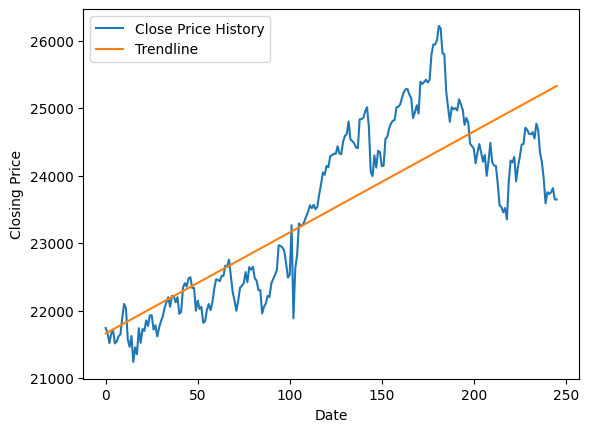

In [ ]:
plt.plot(np.arange(len(stock_data['Close'])), stock_data['Close'], label = 'Close Price History')
plt.plot(np.arange(len(stock_data['Close'])), trendline, label = 'Trendline')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# trend removed obsereve the first and last value .

In [ ]:
# using moving average to remove trend
window = 20
stock_data_MA = stock_data['Close'].rolling(window=window).mean()
detrended_price = stock_data['Close'] - stock_data_MA
detrended_price = detrended_price.dropna()

In [ ]:
adf_test(detrended_price)

ADF Statistic: -3.061
p-value: 0.03
 Critical value 1%: -3.46
 Critical value 5%: -2.874
 Critical value 10%: -2.574


* here we can see from our moving average detredning method , data has become stationary . as p < 0.05

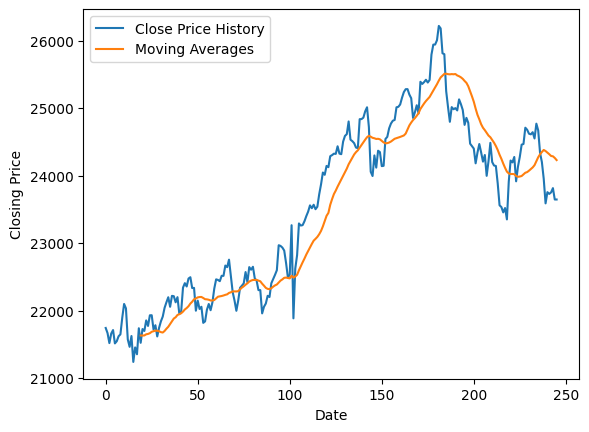

In [ ]:
plt.plot(np.arange(len(stock_data['Close'])), stock_data['Close'], label = 'Close Price History')
plt.plot(np.arange(len(stock_data['Close'])), stock_data_MA, label = 'Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

*Seasonal* *Adjustment*

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(stock_data['Close'], model='additive', period=30)
price_adjusted = stock_data['Close'] / decomposition.seasonal
price_adjusted = price_adjusted.dropna()

In [ ]:
adf_test(price_adjusted)

ADF Statistic: -5.357
p-value: 0.0
 Critical value 1%: -3.459
 Critical value 5%: -2.874
 Critical value 10%: -2.574


* data has become stationary as p < 0.05 , after we removed the seasonal part .

# **Time Series Forecasting Models**

### AR model (autoregressive)

In [ ]:
stock_data = yf.download('^NSEI', start='2023-01-01', multi_level_index=False)
stock_data.head(7)

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,18197.449219,18215.150391,18086.500000,18131.699219,256100
2023-01-03,18232.550781,18251.949219,18149.800781,18163.199219,208700
2023-01-04,18042.949219,18243.000000,18020.599609,18230.650391,235200
2023-01-05,17992.150391,18120.300781,17892.599609,18101.949219,269900
2023-01-06,17859.449219,18047.400391,17795.550781,18008.050781,238200
2023-01-09,18101.199219,18141.400391,17936.150391,17952.550781,257200
2023-01-10,17914.150391,18127.599609,17856.000000,18121.300781,283300


In [ ]:
stock_data.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2025-03-12', '2025-03-13', '2025-03-17', '2025-03-18',
               '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24',
               '2025-03-25', '2025-03-26'],
              dtype='datetime64[ns]', name='Date', length=550, freq=None)

In [ ]:
# making data stationary before applying model fitting
nifty50_price_stationary = stock_data['Close'].diff().dropna()

# spliting the data into training and testing datasets
train_data, test_data = nifty50_price_stationary[:-30], nifty50_price_stationary[-30:]

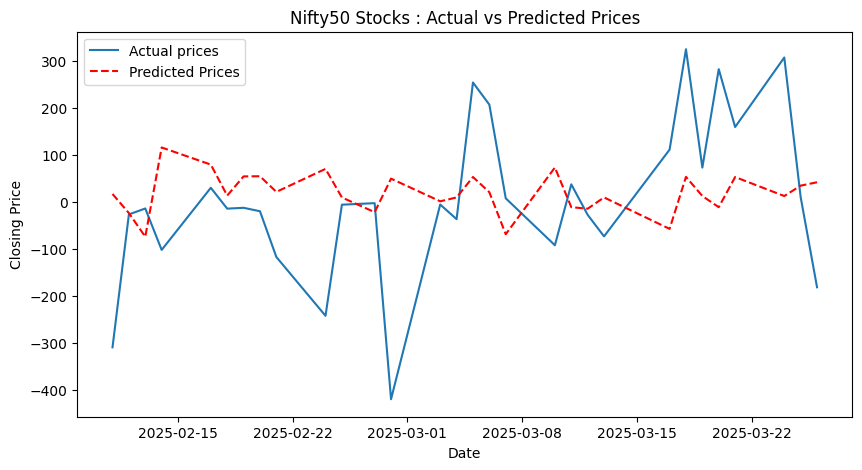

Root Mean Squared Error (RMSE): 180.05


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

model = AutoReg(train_data, lags=30)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Actual prices')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices', linestyle='--')
plt.title('Nifty50 Stocks : Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# evaluating model using rmse score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

### MA model (moving average)

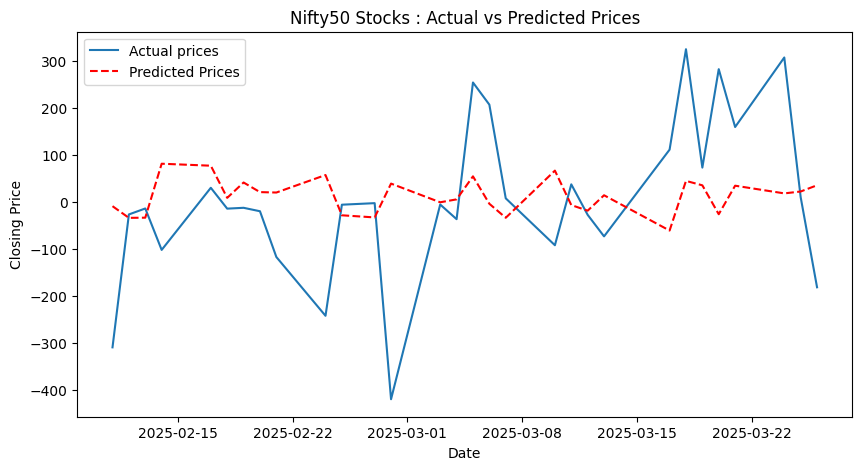

Root Mean Squared Error (RMSE): 175.98


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(0, 0, 30)) # (p,d,q) p & d = 0 , only q written which makes it moving average model .
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Actual prices')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices', linestyle='--')
plt.title('Nifty50 Stocks : Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

### ARMA model (autoregressive moving average)

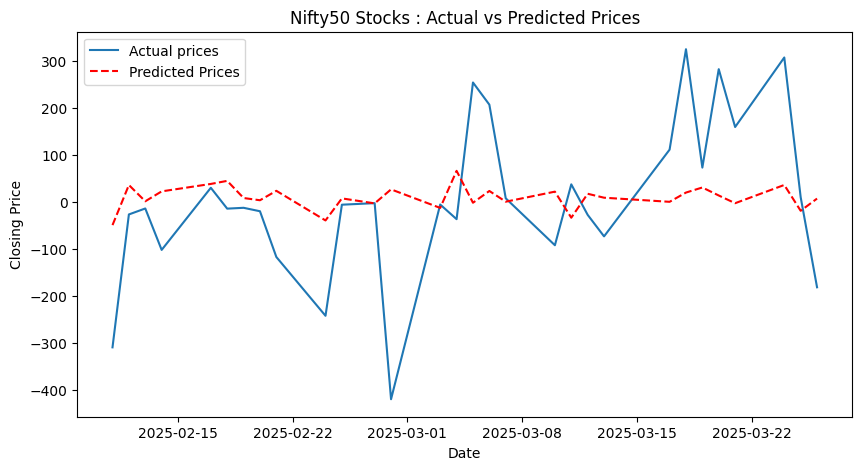

Root Mean Squared Error (RMSE): 164.05


In [ ]:
model = ARIMA(train_data, order=(7, 0, 7))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Actual prices')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices', linestyle='--')
plt.title('Nifty50 Stocks : Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

### ARIMA model (autoregressive integrated moving average)

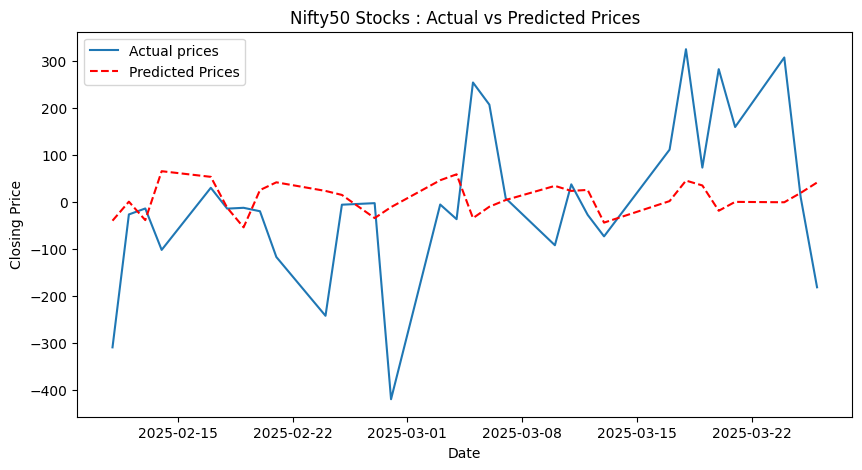

Root Mean Squared Error (RMSE): 172.04


In [ ]:
model = ARIMA(train_data, order=(7, 1, 7))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Actual prices')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices', linestyle='--')
plt.title('Nifty50 Stocks : Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

### SARIMA model (seasonal arima)

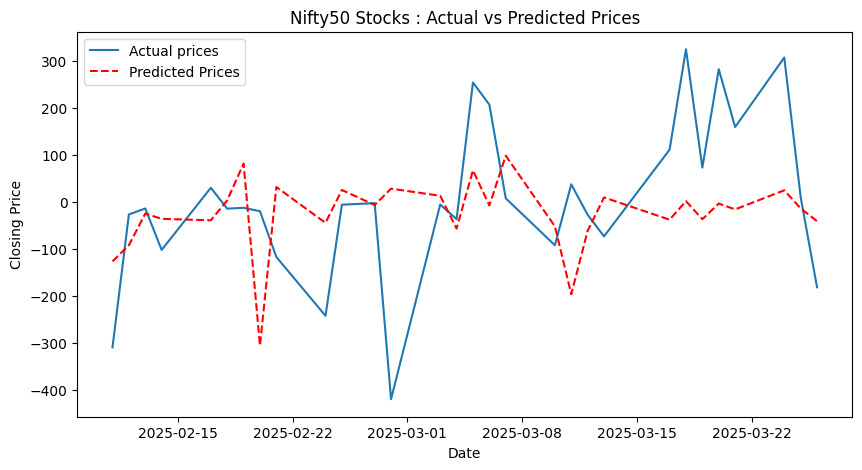

Root Mean Squared Error (RMSE): 174.14


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 7, 1, 7
P, D, Q, s = 7, 1, 7, 45    # P, D, Q are order of seasonal part and 's' is the seasonal order .

model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Actual prices')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices', linestyle='--')
plt.title('Nifty50 Stocks : Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

* In these Univariate models we were fitting past close price and predicting future close price .
* ARMA model gave as the best close to actual price results .

## Vector Models

In [ ]:
tcs_data = yf.download('TCS.NS', start='2023-01-01', multi_level_index=False)
tcs_data.head(7)

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,3117.667969,3122.830048,3092.575208,3117.237854,709547
2023-01-03,3165.368408,3173.636977,3102.230192,3108.634774,1245178
2023-01-04,3168.522705,3180.663009,3141.326977,3160.923230,1231668
2023-01-05,3165.128906,3190.173822,3137.263856,3183.386735,1826057
2023-01-06,3069.967773,3156.000093,3058.926912,3154.518378,2488376
2023-01-09,3173.588623,3180.327868,3079.144214,3086.648237,2885060
2023-01-10,3141.517578,3152.606281,3087.699774,3140.179391,3864655


In [ ]:
stock_data['TCS_close'] = tcs_data['Close']
stock_data['nifty50_close'] = stock_data['Close'].shift(1)
stock_data.dropna(inplace=True)
stock_data.head()

,Close,High,Low,Open,Volume,TCS_close,nifty50_close
Date,,,,,,,
2023-01-03,18232.550781,18251.949219,18149.800781,18163.199219,208700,3165.368408,18197.449219
2023-01-04,18042.949219,18243.000000,18020.599609,18230.650391,235200,3168.522705,18232.550781
2023-01-05,17992.150391,18120.300781,17892.599609,18101.949219,269900,3165.128906,18042.949219
2023-01-06,17859.449219,18047.400391,17795.550781,18008.050781,238200,3069.967773,17992.150391
2023-01-09,18101.199219,18141.400391,17936.150391,17952.550781,257200,3173.588623,17859.449219


In [ ]:
# performing granger casualty test
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(stock_data[['nifty50_close', 'TCS_close']], maxlag=[14])
print()


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=10.4795 , p=0.0000  , df_denom=506, df_num=14
ssr based chi2 test:   chi2=155.1214, p=0.0000  , df=14
likelihood ratio test: chi2=136.2114, p=0.0000  , df=14
parameter F test:         F=10.4795 , p=0.0000  , df_denom=506, df_num=14



* Through Granger causality test, the p-value for lagged values in predicting is less than significance level (0.05), then 'nifty50' is said to "Granger cause" 'TCS', meaning past values of nitfy50 improve the prediction of TCS .

In [ ]:
data = stock_data[['nifty50_close', 'TCS_close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

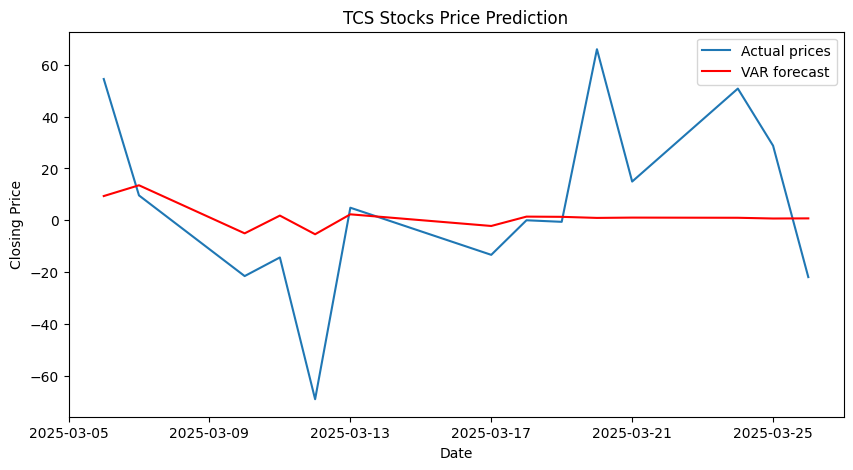

Root Mean Squared Error (RMSE): 32.75


In [ ]:
from statsmodels.tsa.api  import VAR, VARMAX
# VAR
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index , columns=test_data.columns)
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data['TCS_close'], label='Actual prices')
plt.plot(test_data.index, predictions['TCS_close'], color='red', label='VAR forecast')
plt.title('TCS Stocks Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data['TCS_close'], predictions['TCS_close'])),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

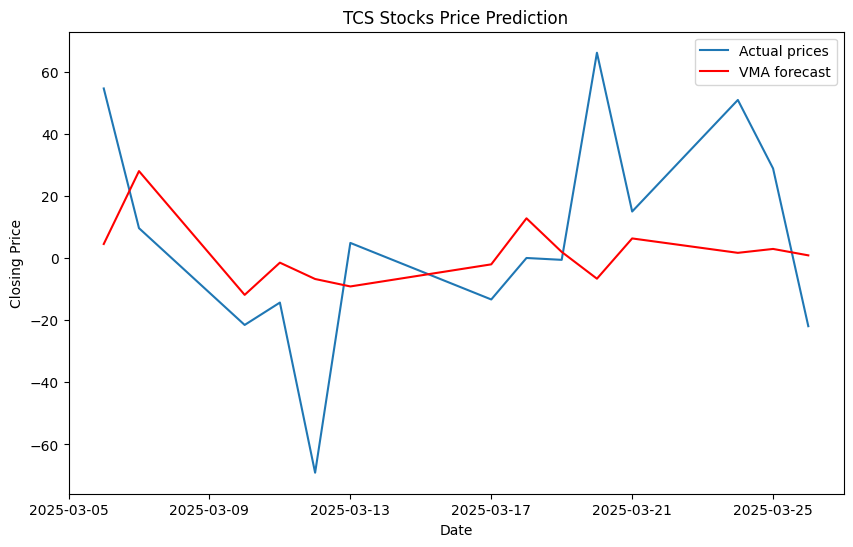

Root Mean Squared Error (RMSE): 34.28


In [ ]:
# VMA
model = VARMAX(train_data, order=(0,14))
result = model.fit()
predictions = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TCS_close'], label='Actual prices')
plt.plot(test_data.index, predictions['TCS_close'], color='red', label='VMA forecast')
plt.title('TCS Stocks Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data['TCS_close'], predictions['TCS_close'])),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

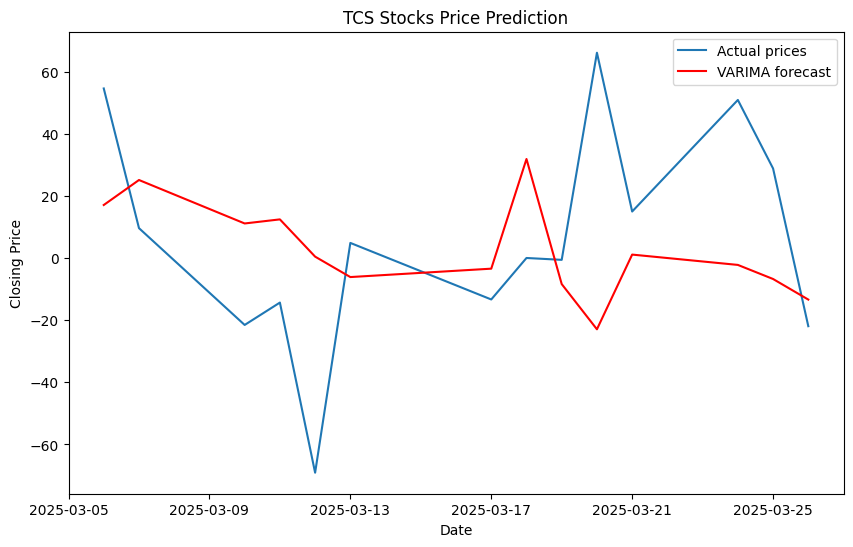

Root Mean Squared Error (RMSE): 39.48


In [ ]:
# VARIMA
model = VARMAX(train_data, order=(14,14))
result = model.fit()
predictions = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TCS_close'], label='Actual prices')
plt.plot(test_data.index, predictions['TCS_close'], color='red', label='VARIMA forecast')
plt.title('TCS Stocks Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data['TCS_close'], predictions['TCS_close'])),2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Smoothing Methods

### Moving Average

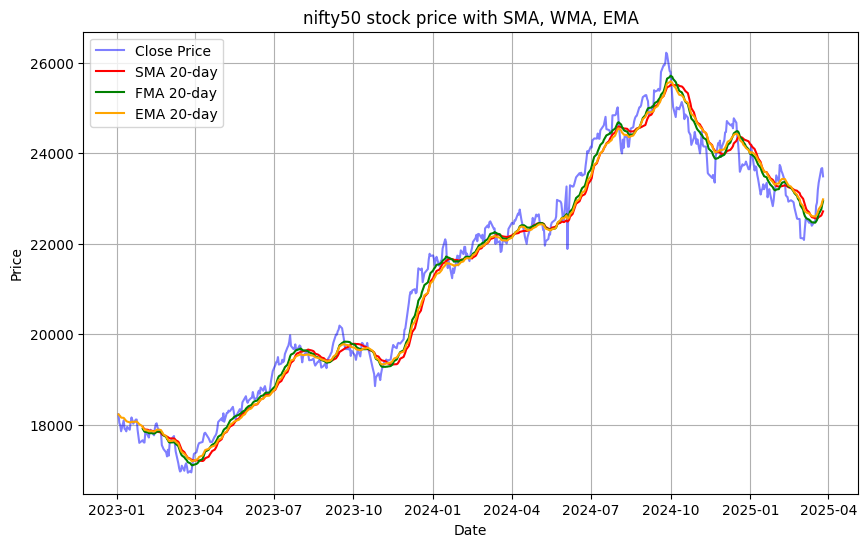

In [ ]:
window_size = 20
prices = stock_data['Close']
# simple moving average
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

# weighted moving average
weights = np.arange(1, window_size+1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices : np.dot(prices, weights) / weights.sum(), raw=True)

# exponetial moving average
stock_data['EMA'] = stock_data['Close'].ewm(span=window_size, adjust=False).mean()

# plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SMA {window_size}-day', color='red')
plt.plot(stock_data['WMA'], label=f'FMA {window_size}-day', color='green')
plt.plot(stock_data['EMA'], label=f'EMA {window_size}-day', color='orange')
plt.title('nifty50 stock price with SMA, WMA, EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Exponential Smothening

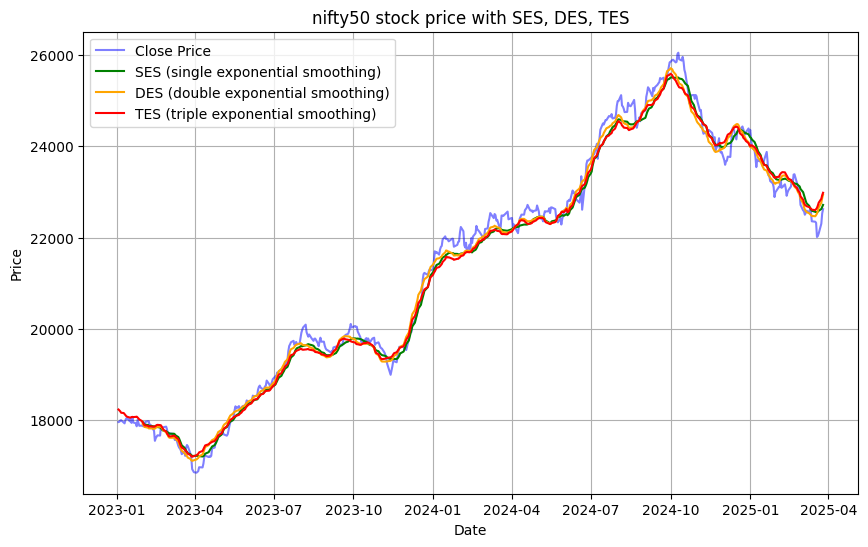

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# SES
ses_model = SimpleExpSmoothing(prices).fit(smoothing_level=0.05)
stock_data['Close'] = ses_model.fittedvalues

# DES
des_model = ExponentialSmoothing(prices, trend='add').fit(smoothing_level=0.05)
stock_data['Close'] = des_model.fittedvalues

# TES
tes_model = ExponentialSmoothing(prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.05)
stock_data['Close'] = tes_model.fittedvalues

plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SES (single exponential smoothing)', color='green')
plt.plot(stock_data['WMA'], label=f'DES (double exponential smoothing)', color='orange')
plt.plot(stock_data['EMA'], label=f'TES (triple exponential smoothing)', color='red')
plt.title("nifty50 stock price with SES, DES, TES")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## ACF and PACF plot

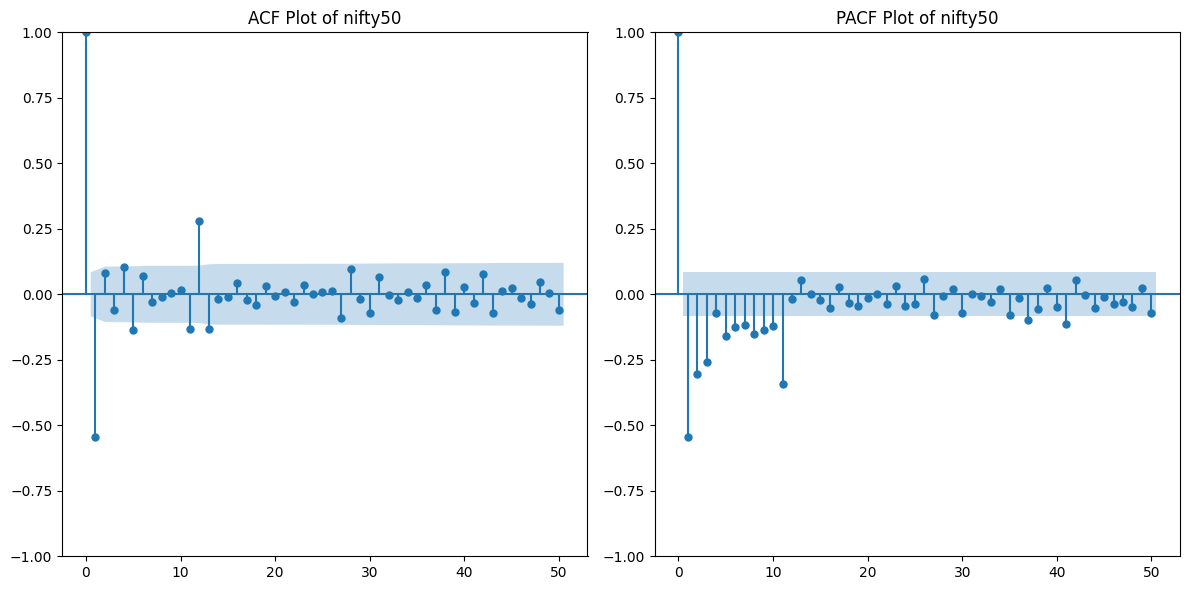

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

# ACF plot
plt.subplot(1,2,1)
plot_acf(stock_data['Close'].diff().diff().dropna() ,ax=plt.gca(), lags=50)
plt.title('ACF Plot of nifty50')

# PACF plot
plt.subplot(1,2,2)
plot_pacf(stock_data['Close'].diff().diff().dropna() ,ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF Plot of nifty50')

plt.tight_layout()
plt.show()

* ACF is cutoff after 1 , so q=1                               
* PACF is cutoff after 10 0r 11 , so p = 10 or 11
* **Hence, its an ARMA model since evething value comes as cutoff**

## Model Evaluation Metrics

In [ ]:
train_data, test_data = nifty50_price_stationary[:-30], nifty50_price_stationary[-30:]

# fiting AR model to training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

# predicting on test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. MAE (mean absolute error)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. MSE (mean squared error)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. RMSE (root mean squared error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. MAPE (mean absolute percentage error)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic
print(f'Akaike information criteria (AIC): {aic}')
print(f'Bayesian information criteria (BIC): {bic}')

Mean Absolute Error (MAE): 135.25498778829996
Mean Squared Error (MSE): 32418.48739379405
Root Mean Squared Error (RMSE): 180.0513465481279
Mean Absolute Percentage Error (MAPE): 208.52239571255052%
Akaike information criteria (AIC): 6442.9701300715915
Bayesian information criteria (BIC): 6577.1257297347875


In [ ]:
model = AutoReg(train_data, lags=20)
model_fit = model.fit()

# predicting on test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False)

# 1. MAE (mean absolute error)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. MSE (mean squared error)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. RMSE (root mean squared error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. MAPE (mean absolute percentage error)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic
print(f'Akaike information criteria (AIC): {aic}')
print(f'Bayesian information criteria (BIC): {bic}')

Mean Absolute Error (MAE): 119.23248323866277
Mean Squared Error (MSE): 27523.673564702294
Root Mean Squared Error (RMSE): 165.902602645957
Mean Absolute Percentage Error (MAPE): 144.47013283792535%
Akaike information criteria (AIC): 6571.748208547442
Bayesian information criteria (BIC): 6664.425542653976


" thank you "